<a href="https://colab.research.google.com/github/sandhyakp/Python-student-practicals/blob/main/medical_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

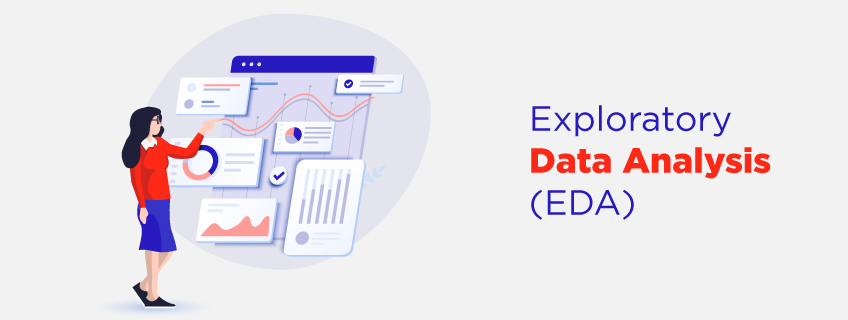

#PRACTICING EDA

Ever wondered why medical costs vary so much? That's exactly what we're exploring in this analysis. We're taking a closer look at data that includes age, BMI, number of children, smoking habits, and regions to figure out what factors play a role in how much people pay for healthcare. Whether you're an insurance provider or someone just curious about healthcare expenses, our goal is to make sense of the numbers and show how different factors come together to impact medical charges.

About Dataset

age: age of primary beneficiary
sex: insurance contractor gender, female, male

bmi: Body mass index, providing an
understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/insurance 1.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/insurance 1.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# DATA PREPROCESSING

##Data Cleaning

#1. Missing Values

In [ ]:
missing=df.isnull().sum()
missing

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in the dataset

##2. Incorrect Data Types

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

All data types seem appropriate.

##3. Duplicate Data

In [ ]:
df.duplicated().sum()

1

In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Since we only have one duplicate, we can drop the row.

In [ ]:
df= df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

# Exploratory Data Analysis

## Univariate Analysis

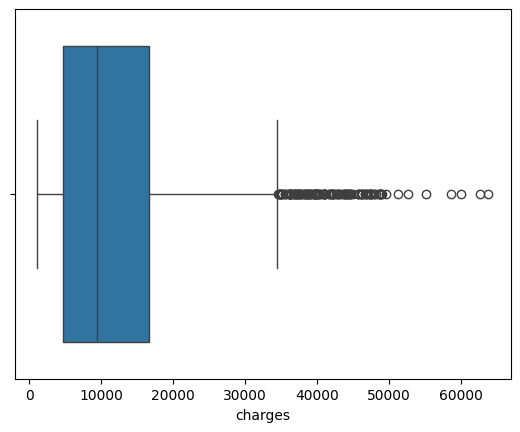

In [ ]:
sns.boxplot(x=df['charges'])
plt.show()

In [ ]:
outliers = df[df['charges'] > df['charges'].quantile(0.75) + 1.5 * (df['charges'].quantile(0.75) - df['charges'].quantile(0.25))]
outliers


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


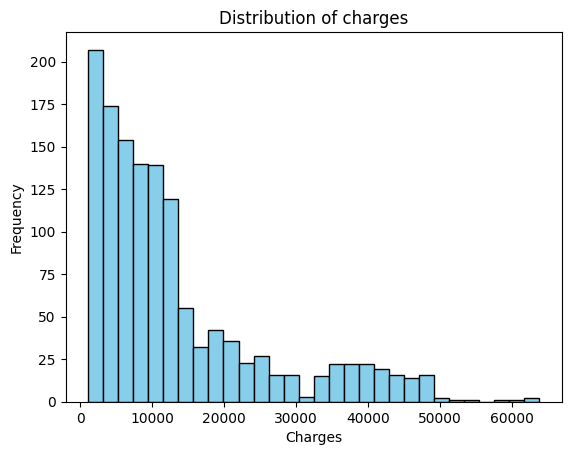

In [ ]:
#OF CHARGES
plt.hist(df['charges'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

from the chart we can see that the distribution of charges is right skewed, which might explain some of the outliers from 35000. The presence of values around 35000 and above in a right-skewed distribution may indicate that these values are part of the natural variability of the data and not necessarily outliers.

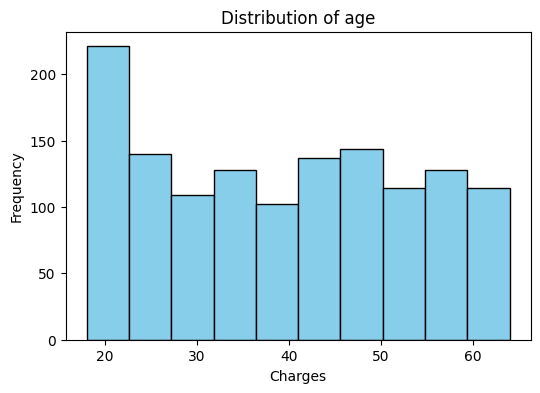

In [ ]:
#What is the distribution of ages in the dataset?
plt.figure(figsize=(6, 4))
plt.hist(df['age'], color='skyblue', edgecolor='black')
plt.title('Distribution of age')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

The univariate analysis of age distribution reveals an almost consistent dataset, with a minor variation in ages across different groups. Notably, the first column exhibits a higher percentage of insurers in their 20s, constituting over 200 individuals. This concentration suggests a specific trend within that subgroup.

In [ ]:
df['age'].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

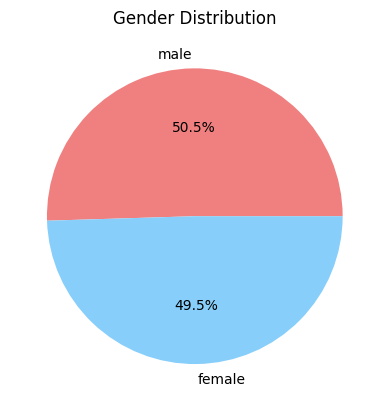

In [ ]:
#What is the distribution of gender in the dataset?
gender_counts= df['sex'].value_counts()
colors = ['lightcoral', 'lightskyblue']
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Gender Distribution')
plt.show()

Female represent a substantial 49.5% of the population, with males comprising the remaining segment. This distribution offers a balanced representation of gender within the dataset

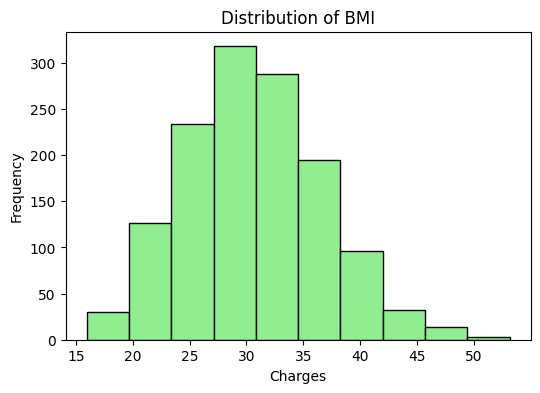

In [ ]:
#What is the distribution of BMI (Body Mass Index) in the dataset?
plt.figure(figsize=(6, 4))
plt.hist(df['bmi'], color='lightgreen', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

the distribution of BMI appears to be normally distributed, indicating a symmetrical spread of values. This suggests a balanced and typical representation of BMI within the dataset.

In [ ]:
df['bmi'].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

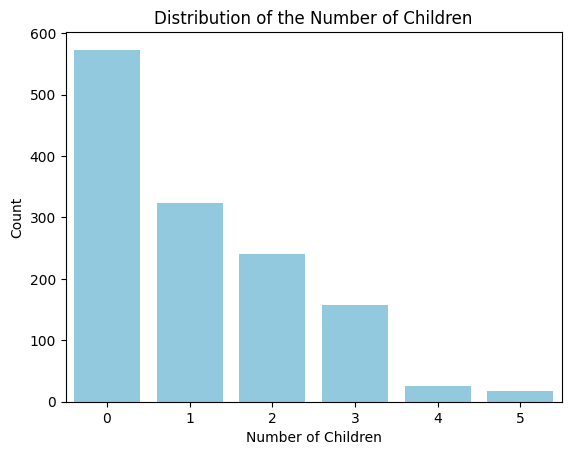

In [ ]:
#What is the distribution of the number of children?
sns.countplot(x='children', data=df, color='skyblue')
plt.title('Distribution of the Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()


The distribution reveals that the majority of the population consists of individuals with no children. As the number of children increases, the count of insurers progressively decreases, highlighting a declining trend OF individuals.

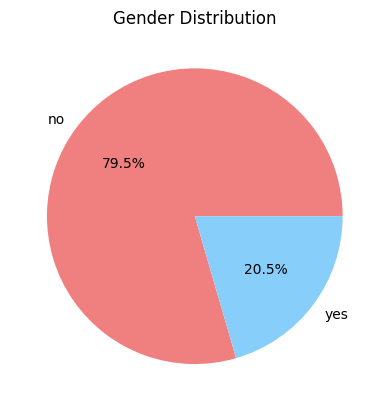

In [ ]:
#What is the percentage of smokers and non-smokers in the dataset?
counts= df['smoker'].value_counts()
colors = ['lightcoral', 'lightskyblue']
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Gender Distribution')
plt.show()

The pie chart reveals that smokers constitute 20.5% of the population, while non-smokers make up the remaining percentage.

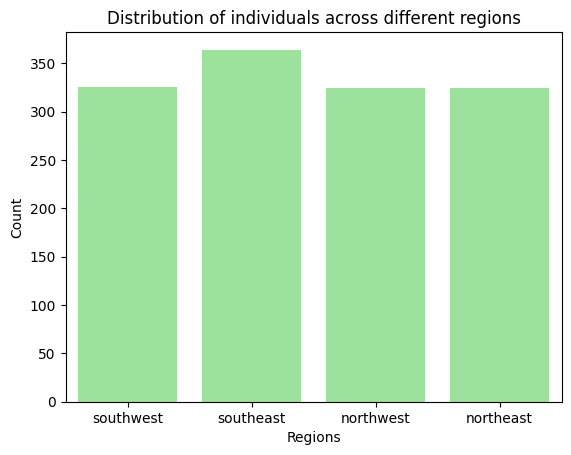

In [ ]:
#What is the distribution of individuals across different regions?
sns.countplot(x='region', data=df, color='lightgreen')
plt.title('Distribution of individuals across different regions')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.show()

All regions exhibit a relatively balanced distribution of insurers, suggesting a comparable representation across the dataset. The Southeast region stands out with a slightly higher number of individuals insured compared to the other regions.

In [ ]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#Bivariate Analysis

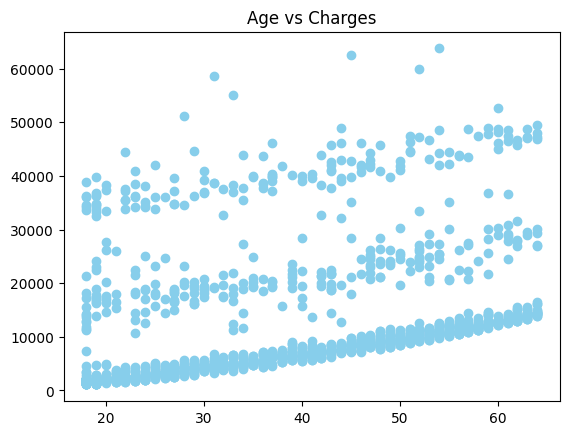

In [ ]:
#How does age correlate with medical charges?
plt.scatter(df['age'], df['charges'], color='skyblue')
plt.title('Age vs Charges')
plt.show()

As evident in the scatter plot, there is a positive correlation between age and medical charges. The visualization suggests that as individuals age increases so does the medical charges.

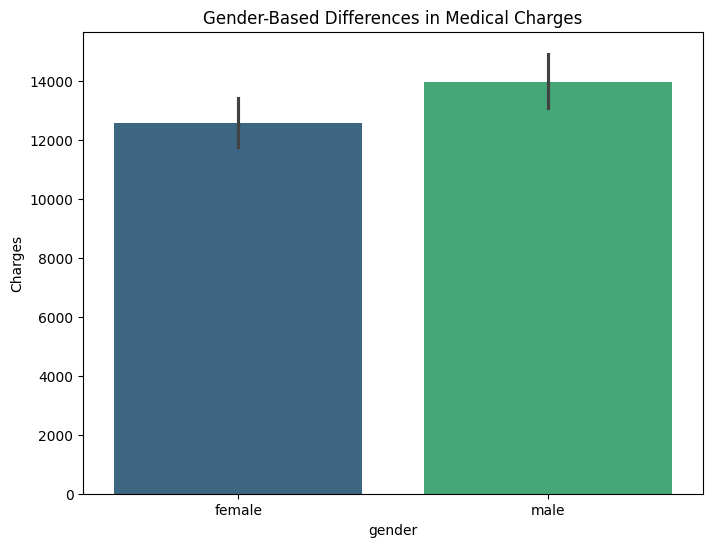

In [ ]:
#Are there gender-based differences in medical charges?
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='charges', data=df, hue='sex', palette='viridis')
plt.xlabel('gender')
plt.ylabel('Charges')
plt.title('Gender-Based Differences in Medical Charges')
plt.show()

male individuals having higher medical charges compared to female individuals.

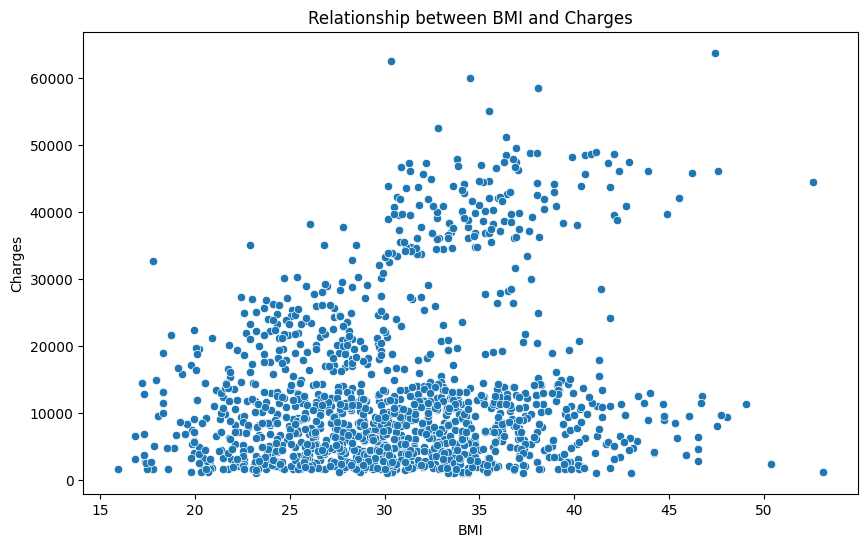

In [ ]:
#Does BMI have a significant impact on the cost of insurance?both are numeric variables
plt.figure(figsize=(10, 6))

sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Relationship between BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


People with elevated BMI tend to incur higher medical charges, particularly noticeable beyond a BMI threshold of 25. This observation underscores the potential correlation between higher BMI values and increased healthcare costs

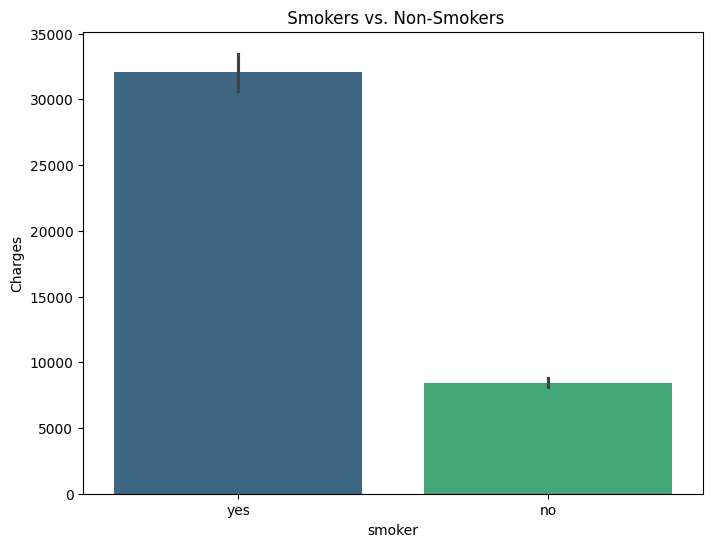

In [ ]:
#Do smokers tend to have higher charges compared to non-smokers?
plt.figure(figsize=(8, 6))
sns.barplot(x='smoker', y='charges', data=df,hue='smoker', palette='viridis')
plt.ylabel('Charges')
plt.title(' Smokers vs. Non-Smokers')
plt.show()

Smokers tend to have higher average medical charges compared to non-smokers, indicating a potential association between smoking and increased healthcare costs in the dataset.

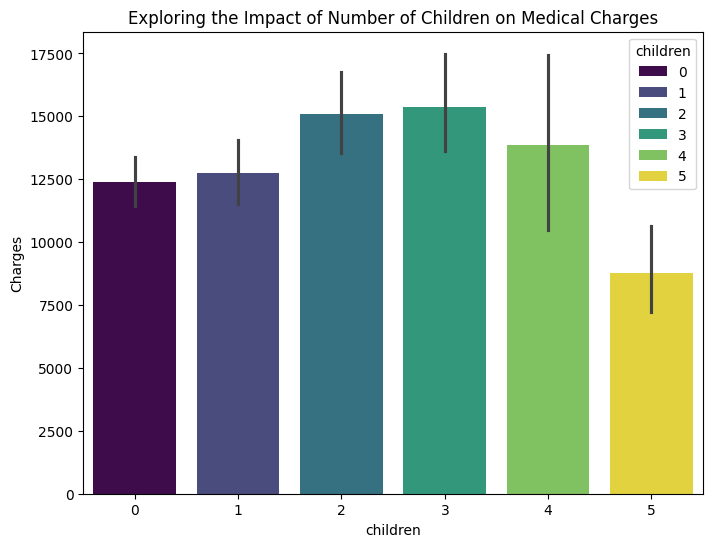

In [ ]:
#Are individuals with more children likely to have higher or lower charges?
plt.figure(figsize=(8, 6))
sns.barplot(x='children', y='charges', data=df, hue='children', palette='viridis')
plt.ylabel('Charges')
plt.title('Exploring the Impact of Number of Children on Medical Charges')
plt.show()

As the number of children increases, medical charges generally rise, except for individuals with 4 or 5 children, where charges decrease. This finding prompts further investigation for nuanced insights into healthcare costs.

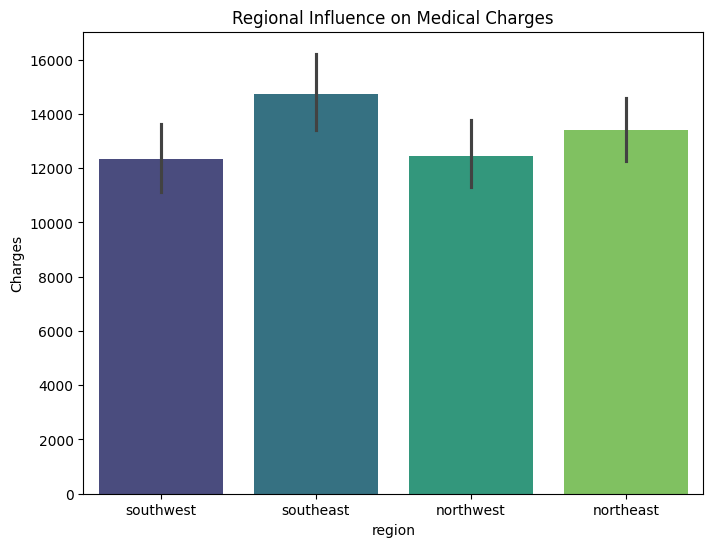

In [ ]:
#Is there a correlation between the region and medical charges?
plt.figure(figsize=(8, 6))
sns.barplot(x='region', y='charges', data=df, hue='region', palette='viridis')
plt.ylabel('Charges')
plt.title('Regional Influence on Medical Charges')
plt.show()

Medical charges in different regions show similar patterns, proportionate to their populations. The impact of geography on healthcare costs appears consistent across regions.

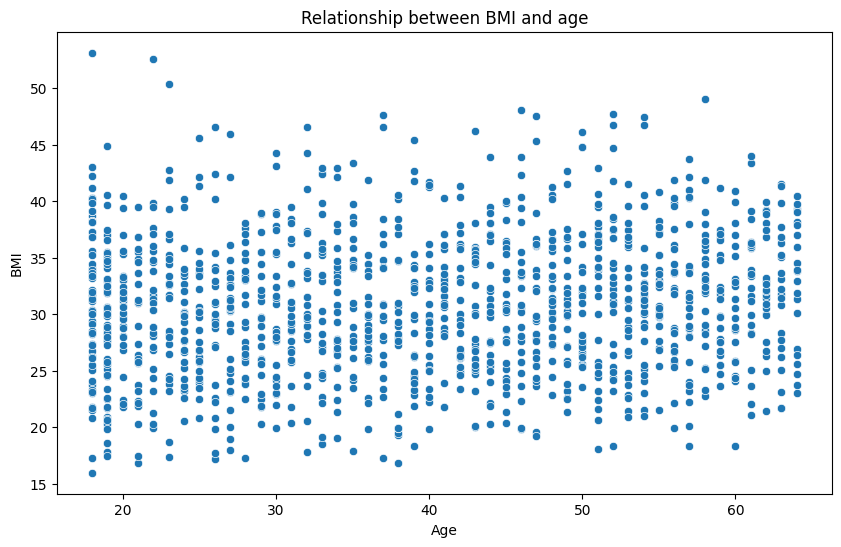

In [ ]:
#Is there a trend indicating how BMI changes with age?
plt.figure(figsize=(10, 6))

sns.scatterplot(x='age', y='bmi', data=df)
plt.title('Relationship between BMI and age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

Across various age groups, there appears to be a fairly even distribution of BMI. This suggests a balanced spread of body mass index across different age categories.

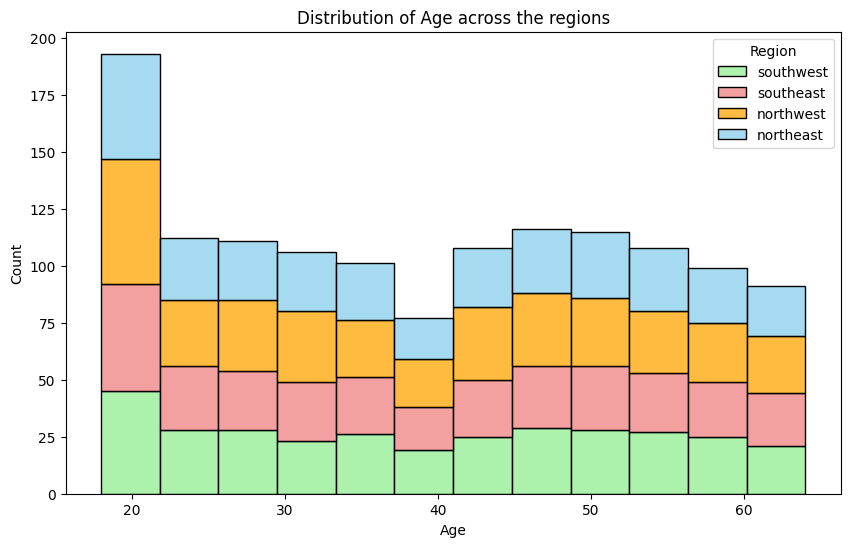

In [ ]:
#How is the distribution of age spread across different regions?
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='age', hue='region', multiple='stack',  palette=['skyblue', 'orange','lightcoral', 'lightgreen'])
plt.title('Distribution of Age across the regions')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Region', labels=df['region'].unique())
plt.show()

The chart shows that people of different ages are pretty evenly spread out across all regions. It seems like each region has a similar mix of age groups. The colors in the chart make it easy to see this balance

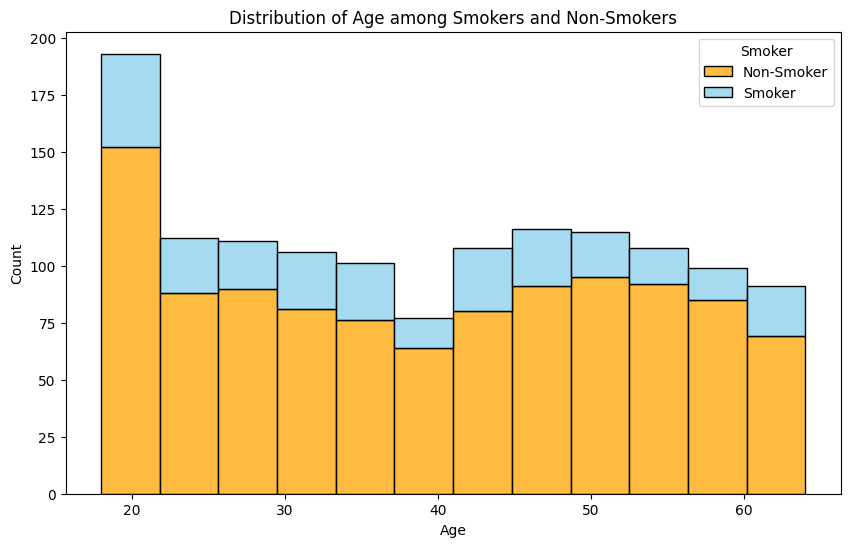

In [ ]:
#What is the distribution of age among smokers and non-smokers?
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='age', hue='smoker', multiple='stack',  palette=['skyblue', 'orange'])
plt.title('Distribution of Age among Smokers and Non-Smokers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Smoker',labels=['Non-Smoker', 'Smoker'])
plt.show()



The distribution of smokers seem to be uniformly ditributed across all age groups

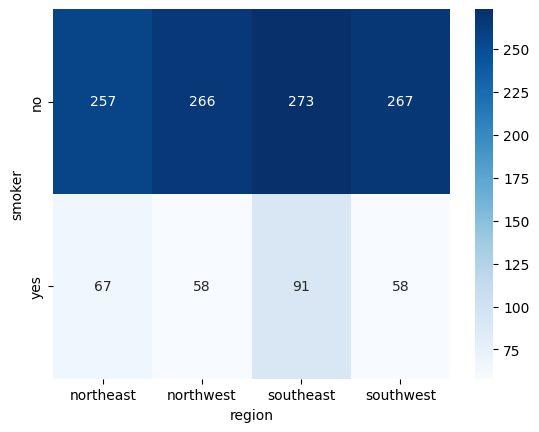

In [ ]:
#Smoker Distribution Across Regions
cross_tab = pd.crosstab(df['smoker'], df['region'])
#annot=True: Displays the counts on the heatmap.
#cmap='Blues': Specifies the color map for the heatmap (in this case, using shades of blue).
#fmt='d': Formats the annotations as integer
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.show()


Southeast region seems to have the highest number of smokers across all regions.

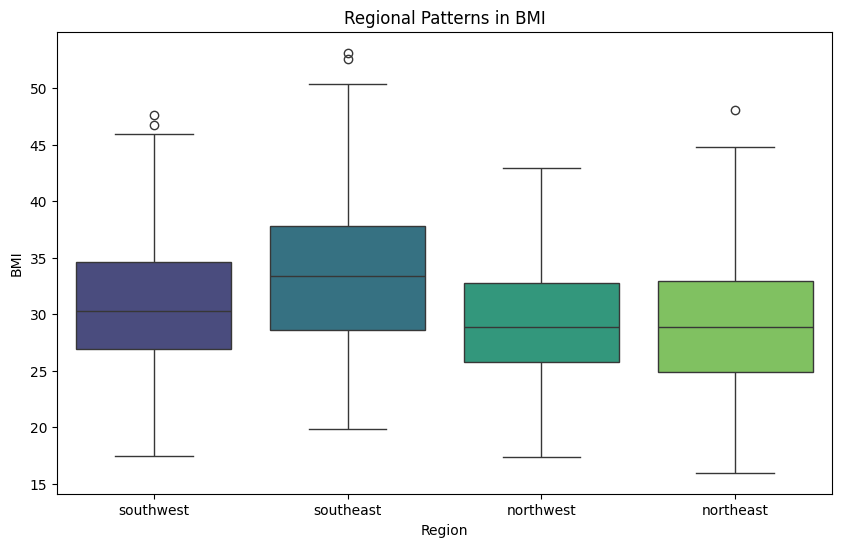

In [ ]:
#Is there any regional pattern in BMI?
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='bmi',hue='region', data=df, palette='viridis')

plt.title('Regional Patterns in BMI')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.show()


The slight differences in BMI across regions, as shown in the box plot, suggest that people in different areas may have varying body mass index patterns. This highlights regional influences on BMI

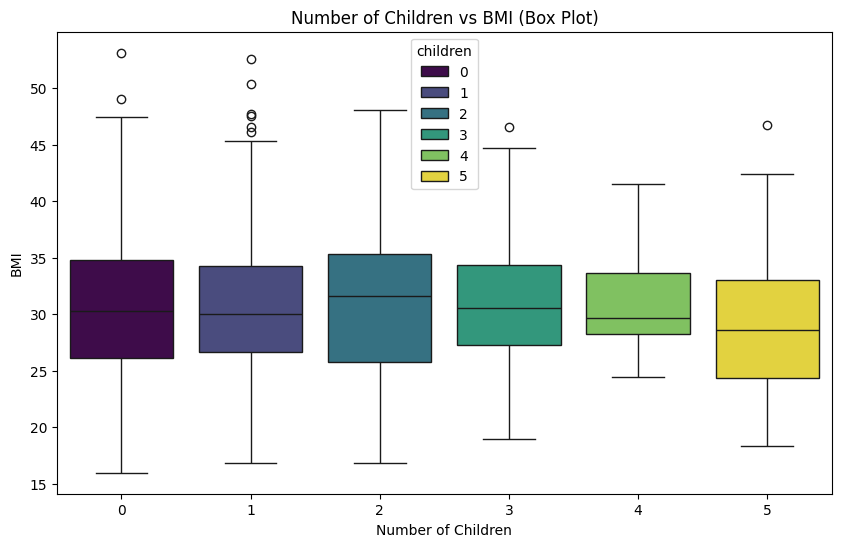

In [ ]:
#Is there a difference in BMI based on the number of children?
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='bmi',hue='children', data=df, palette='viridis')
plt.title('Number of Children vs BMI (Box Plot)')
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.show()


The box plots illustrate subtle variations in BMI based on the number of children, indicating slight differences in body mass index across different family sizes. The observed variations in BMI based on the number of children could be influenced by various factors related to lifestyle, dietary habits, and physical activity within different family sizes.

##Multivariate Analysis

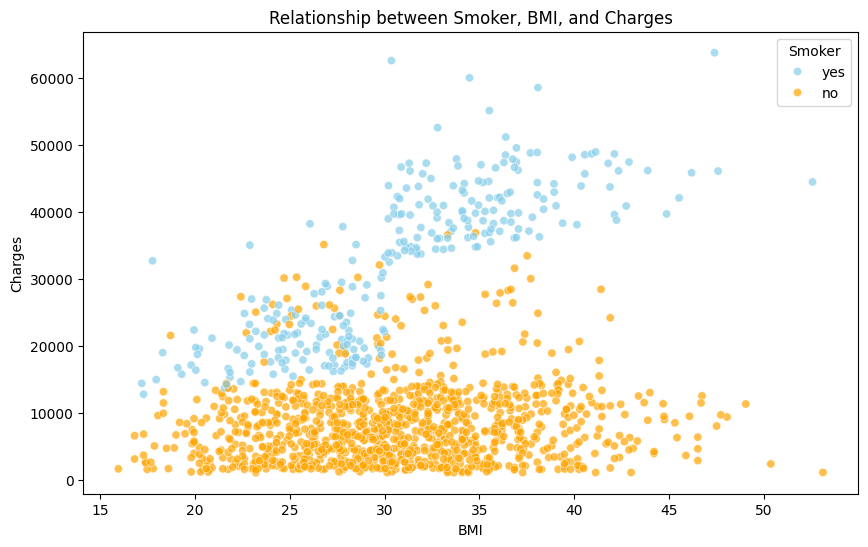

In [ ]:
#Relationship between Smoker, BMI, and Charges
plt.figure(figsize=(10, 6))

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette=['skyblue', 'orange'], alpha=0.7)
plt.title('Relationship between Smoker, BMI, and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()


from the scatter plot we learn that non-smokers tend to have lower medical charges in contrast to smokers, who exhibit higher medical charges. This insight underscores the potential impact of smoking habits on healthcare costs within the dataset, emphasizing the notable divergence in charges between these two groups.Most people in the population have BMIs between 20 and 40, showing a mix of normal weight, overweight, and various degrees of obesity. This diversity highlights the range of body compositions within the insurers.

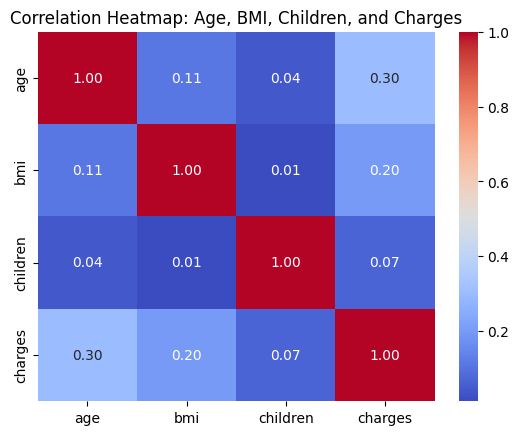

In [ ]:
#Correlation Heatmap: Age, BMI, Children, and Charges
correlation_matrix = df[['age', 'bmi', 'children', 'charges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Age, BMI, Children, and Charges')
plt.show()



## Factors influencing healthcare costs

Age: yes

BMI(Body Mass Index): yes

Number of Children: yes

Smoking Habits: yes

Region: yes


# Conclusions and Recommendations

Healthcare costs rise with age due to increased healthcare needs associated with aging. Males typically face higher medical charges compared to females. Higher BMI is linked to increased healthcare expenses, particularly beyond a BMI of 25. Smokers tend to have higher medical charges due to the impact of smoking-related illnesses. While medical charges generally increase with the number of children, exceptions warrant further investigation.

Implementing smoking cessation programs to reduce the prevalence of smoking-related illnesses.Promoting healthy lifestyle initiatives to address BMI-related health issues. Preventive Care Initiatives: Advocate for increased investment in preventive care initiatives aimed at reducing the incidence of chronic diseases and promoting overall health and wellness.

Make healthcare plans that match the needs of people as they get older. This includes preventing health problems and managing long-term conditions.